# Importing Libraries for Data Processing, Model Building

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report

# load dataset

In [2]:
df = pd. read_csv(r"heart_disease_uci.csv")
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [171]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


# Detailed Dataset Structure and Summary

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

# Visualizing Missing Data

Text(0.5, 1.0, 'Heatmap of Missing Values in DataFrame')

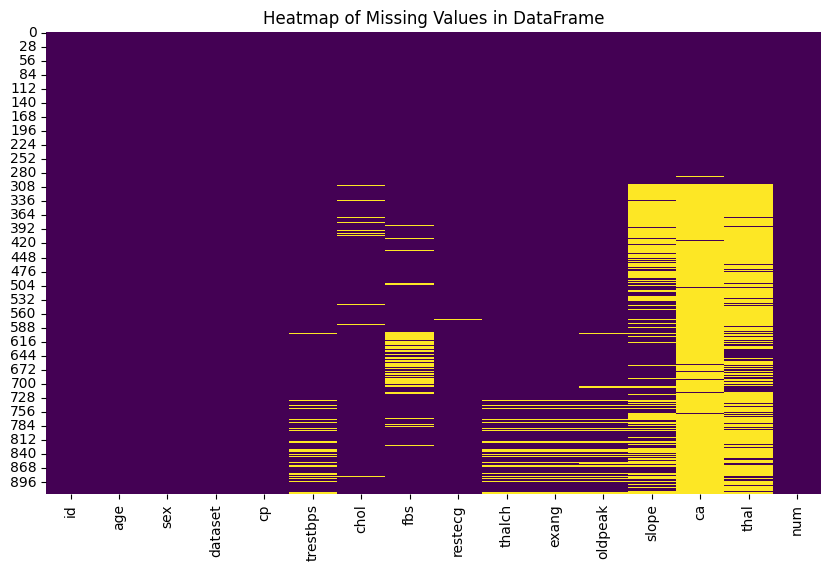

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values in DataFrame")


# Drop Columns

In [9]:
df = df.drop(columns=["dataset","id"])


In [10]:
df = df[df.isnull().sum(axis=1) <= 4 ]

In [39]:
df.shape

(863, 14)

In [40]:
df["num"].value_counts()

num
0    391
1    252
2    101
3     93
4     26
Name: count, dtype: int64

# check outliers in dataset

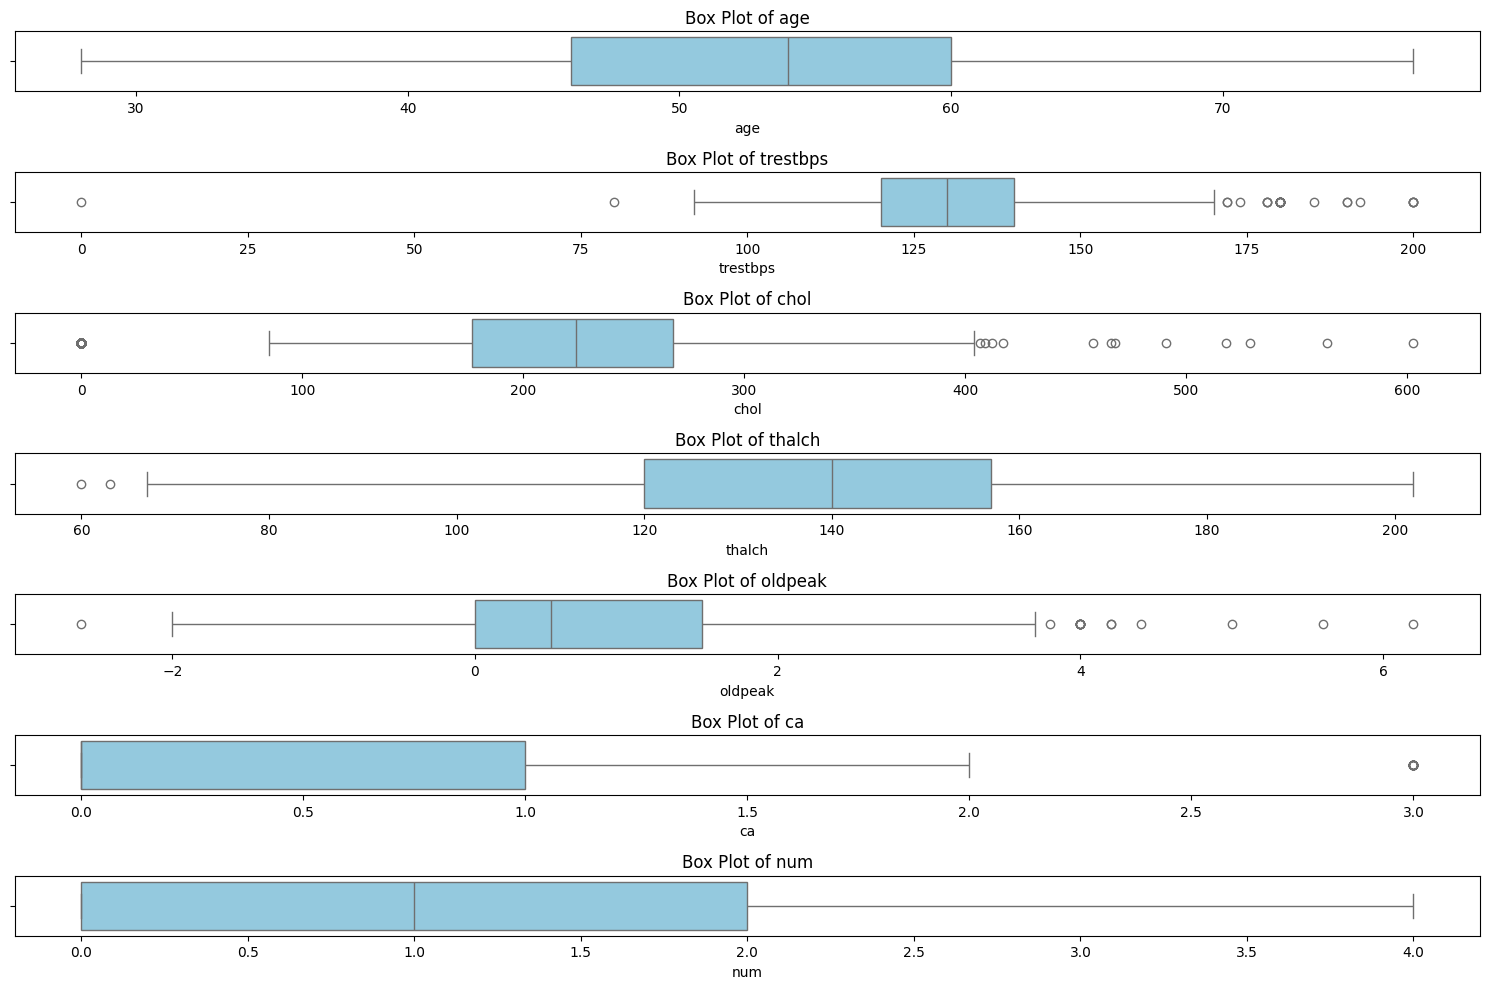

In [19]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set the plot size
plt.figure(figsize=(15, 10))

# Create a box plot for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)  # Create a subplot for each column
    sns.boxplot(x=df[column], color='skyblue')  # Plot boxplot
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()

# Remove Outliers

In [16]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for all numeric columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)

# Compute IQR for each numeric column
IQR = Q3 - Q1

# Create a boolean mask where outliers are detected
# Outliers are any values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]

# Check the dataset after removing outliers



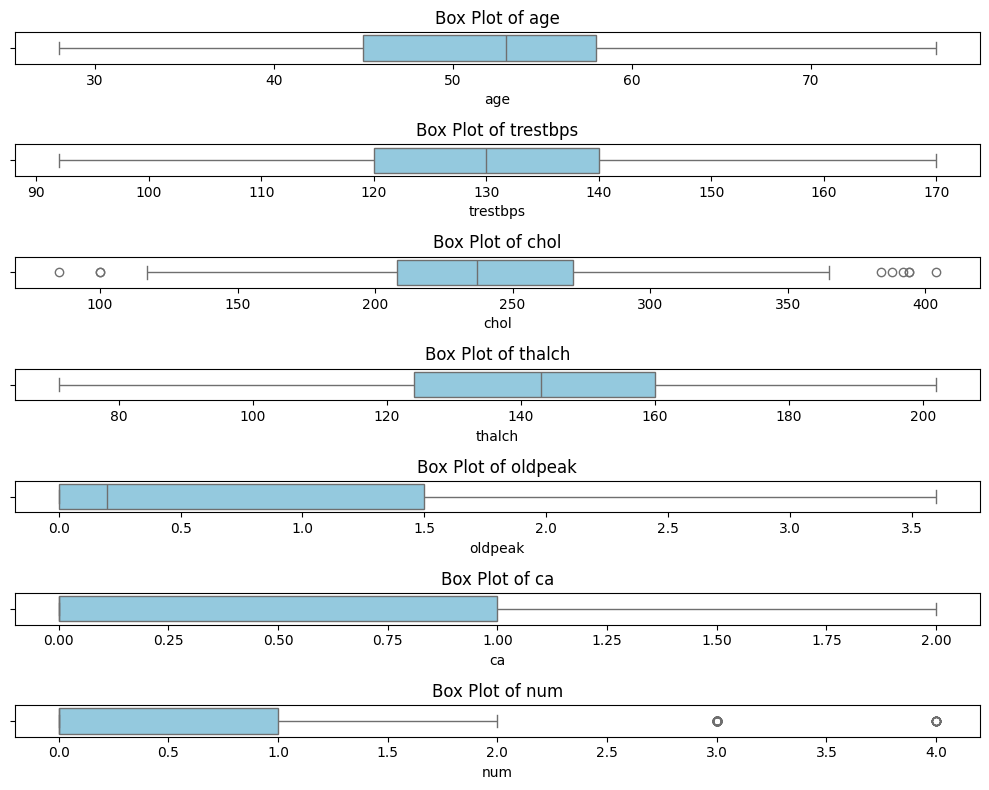

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns (int64 and float64 types)
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Set the plot size
plt.figure(figsize=(10, 8))

# Create a box plot for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)  # Create a subplot for each column
    sns.boxplot(x=df_cleaned[column], color='skyblue')  # Plot boxplot
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


# Count of Duplicate Rows in DataFrame

In [ ]:
duplicate = df.duplicated()
print(duplicate.sum())

# Feature and Target Variable Extraction

In [23]:
x = df_cleaned.drop(columns=["num"])
y = df_cleaned["num"]

In [24]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [52]:
x.shape

(643, 13)

# Feature Transformation Pipelines

In [179]:
numerical_features = x.drop(['sex', "cp", "fbs", "restecg", "exang", "slope", "thal"], axis=1).columns
categorical_features = ['sex', "cp", "fbs", "restecg", "exang", "slope", "thal"]

In [180]:
numerical_transform = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", StandardScaler())
])

categorical_transform = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transform, categorical_features),
        ("num", numerical_transform, numerical_features)
    ]
)



In [181]:
x = preprocessor.fit_transform(x)

# Missing Data Analysis After Transformation

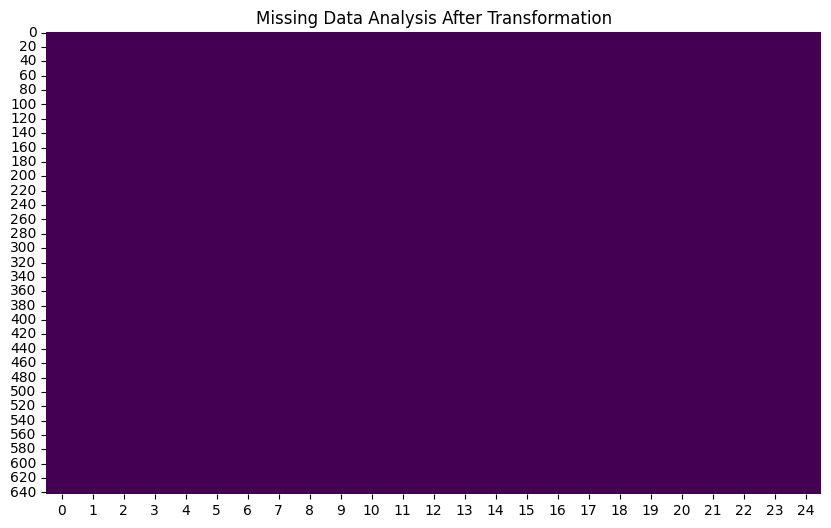

In [57]:
x_df = pd.DataFrame(x)

# Plot heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(x_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Analysis After Transformation")
plt.show()

# Data Split: Training and Testing Sets

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=39, stratify=y)

In [59]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Empowering the Random Forest: 
Model Training

In [94]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)


RandomForestClassifier()

# Accuracy
Accuracy is the ratio of correct predictions (both positives and negatives) to the total number of cases.

In [98]:
y_pred_rf = model_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.68


# Actual vs Predicted Values graph

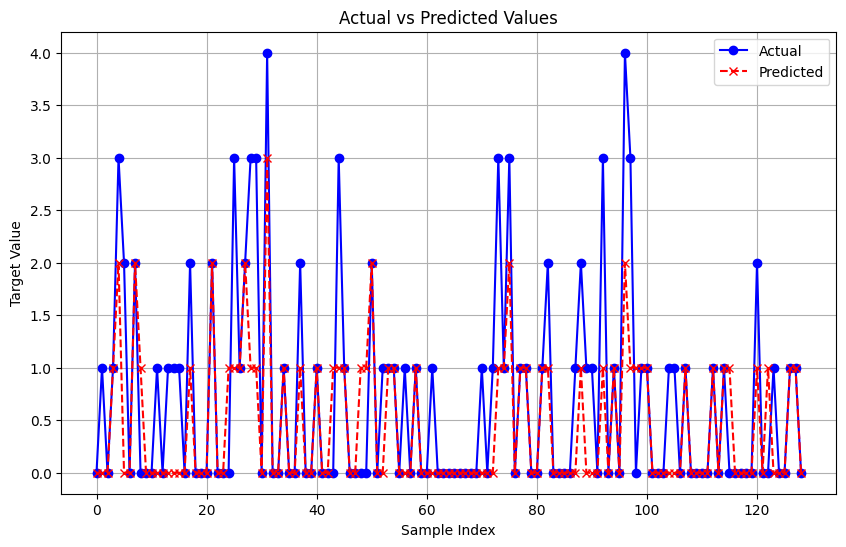

In [101]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='b', marker='o')  # Actual values
plt.plot(y_pred_rf, label='Predicted', color='r', linestyle='--', marker='x')  # Predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

#  Gini Coefficient (using AUC score for binary classification)
The Gini coefficient is derived from the AUC (Area Under the Curve) of the ROC (Receiver Operating Characteristic) curve. The formula is: 

Gini=2×AUC−1

In [102]:
#  Gini Coefficient (using AUC score for binary classification)
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for each class
y_pred_proba = model_rf.predict_proba(x_test)

# Multi-class classification using OvR (One-vs-Rest)
if len(model_rf.classes_) > 2:
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
else:
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # For binary classification

print(f"AUC Score: {auc}")




AUC Score: 0.8714081623065534


 # Confusion Matrix
A confusion matrix provides a summary of prediction results, showing True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

In [103]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)


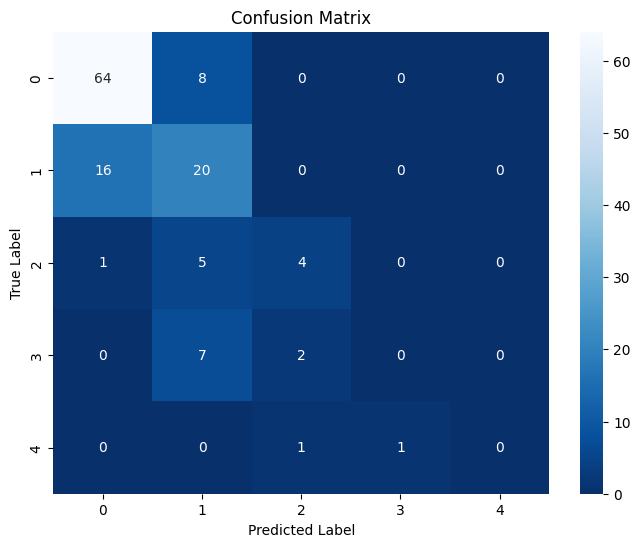

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision
Precision measures the proportion of positive identifications that are actually correct (TP / (TP + FP)).

In [106]:
# Precision
precision = precision_score(y_test, y_pred_rf, average='macro')
print(f"Precision: {precision}")

Precision: 0.37231040564373896


C:\Users\PMYLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Recall
Recall (or sensitivity) is the proportion of actual positives that were correctly identified (TP / (TP + FN)).

In [107]:
# Recall
recall = recall_score(y_test, y_pred_rf, average='macro')
print(f"Recall: {recall}")

Recall: 0.36888888888888893


# F1 Score
The F1 score is the harmonic mean of precision and recall, offering a balance between the two.

In [126]:
# F1 Score
f1 = f1_score(y_test, y_pred_rf, average="macro")
print(f"F1 Score: {f1}")


F1 Score: 0.3667010663914689


# AUC-ROC Curve
The ROC curve plots the True Positive Rate (Recall) vs. the False Positive Rate. The AUC score summarizes the performance.

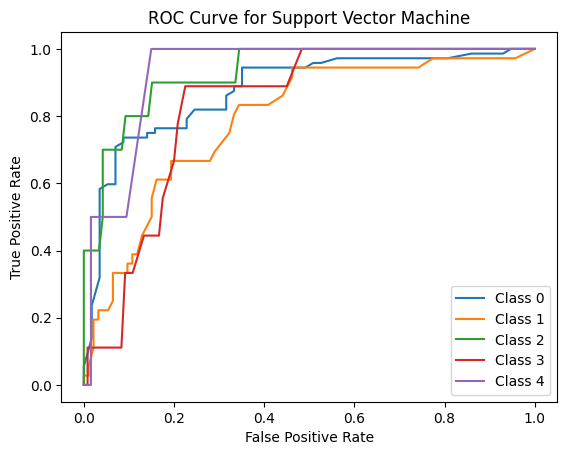

In [110]:
# AUC-ROC Curve
from sklearn.preprocessing import label_binarize
def plot_roc_curve(model, X_test, y_test):
    # Check if the model has predict_proba(), otherwise use decision_function()
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
    else:
        y_probs = model.decision_function(X_test)

    # Handle binary and multi-class classification
    if len(model.classes_) > 2:
        # Multi-class case (One-vs-Rest)
        y_test_bin = label_binarize(y_test, classes=model.classes_)
        for i, class_name in enumerate(model.classes_):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
            plt.plot(fpr, tpr, label=f'Class {class_name}')
    else:
        # Binary classification case
        y_probs = y_probs[:, 1] if y_probs.ndim > 1 else y_probs
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__}')
    models = ["ROC Curve for logistic Regression", "ROC Curve for DecisionTreeClassifier", "ROC Curve for RandomForestClassifier", "ROC Curve for GradientBoostingClassifier", "ROC Curve for Support Vector Machine"]

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    for i in models:
      plt.title(i)
    plt.legend(loc='best')
    plt.show()
# Example of calling the function for different models
plot_roc_curve(model_rf, x_test, y_test)

# Classification report
A classification report provides key metrics (precision, recall, F1-score, and support) to evaluate the performance of a classification model for each class in a dataset.

In [166]:
class_report = classification_report(y_test, y_pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        72
           1       0.50      0.56      0.53        36
           2       0.57      0.40      0.47        10
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2

    accuracy                           0.68       129
   macro avg       0.37      0.37      0.37       129
weighted avg       0.62      0.68      0.65       129



C:\Users\PMYLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PMYLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PMYLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

# Empowering the Decision Tree Classifier: 

In [157]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [159]:
y_pred_dt = model_dt.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_dt)
print(accuracy)

0.6201550387596899


# Actual vs Predicted Values


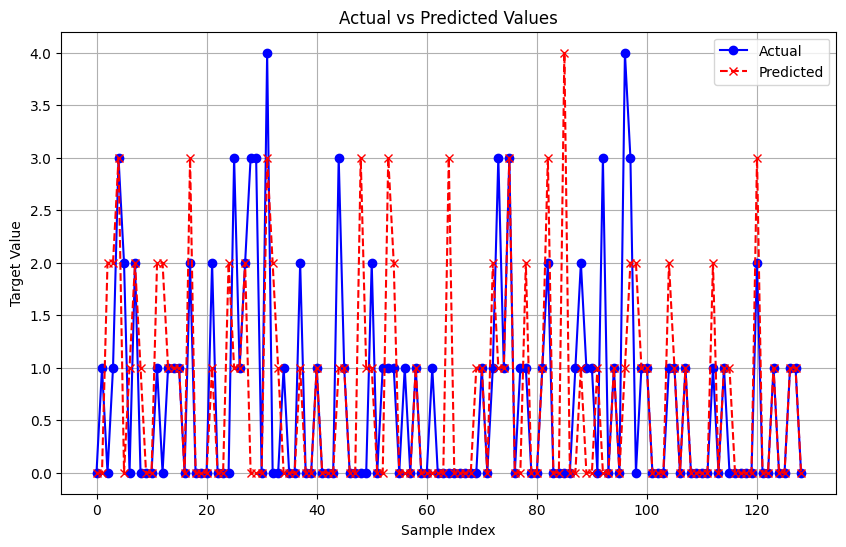

In [160]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='b', marker='o')  # Actual values
plt.plot(y_pred_dt, label='Predicted', color='r', linestyle='--', marker='x')  # Predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

#  Gini Coefficient (using AUC score for binary classification)

In [161]:
#  Gini Coefficient (using AUC score for binary classification)
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for each class
y_pred_proba = model_dt.predict_proba(x_test)

# Multi-class classification using OvR (One-vs-Rest)
if len(model_rf.classes_) > 2:
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
else:
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # For binary classification

print(f"AUC Score: {auc}")

AUC Score: 0.6176855122087068


 # Confusion Matrix

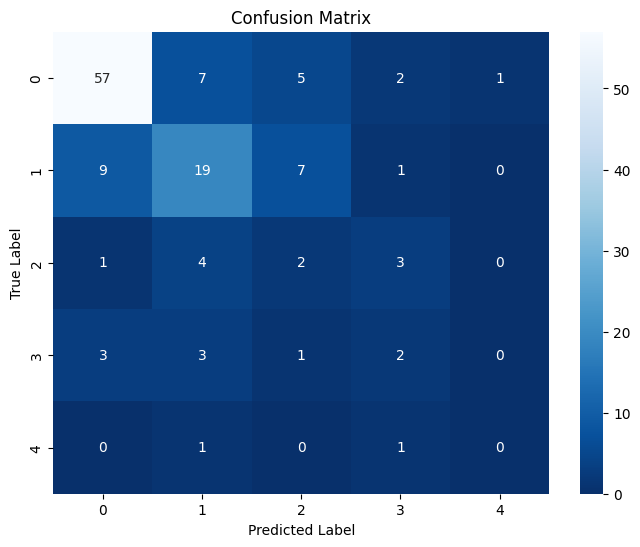

In [162]:
 # Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision


In [163]:
# Precision
precision = precision_score(y_test, y_pred_dt, average='macro')
print(f"Precision: {precision}")

Precision: 0.3457329598506069


# Recall

In [164]:
# Recall
recall = recall_score(y_test, y_pred_dt, average='macro')
print(f"Recall: {recall}")

Recall: 0.34833333333333333


# AUC-ROC Curve


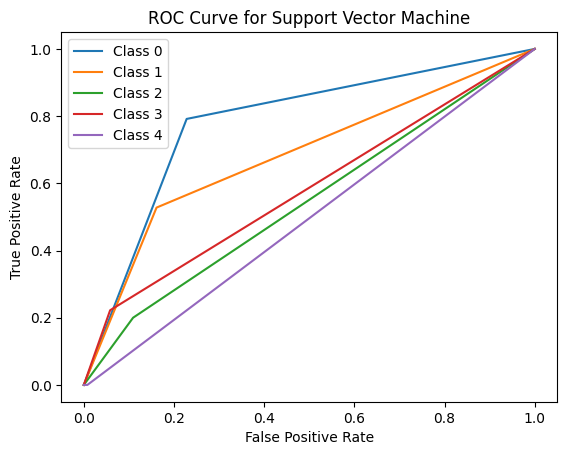

In [165]:
# AUC-ROC Curve
from sklearn.preprocessing import label_binarize
def plot_roc_curve(model, X_test, y_test):
    # Check if the model has predict_proba(), otherwise use decision_function()
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
    else:
        y_probs = model.decision_function(X_test)

    # Handle binary and multi-class classification
    if len(model.classes_) > 2:
        # Multi-class case (One-vs-Rest)
        y_test_bin = label_binarize(y_test, classes=model.classes_)
        for i, class_name in enumerate(model.classes_):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
            plt.plot(fpr, tpr, label=f'Class {class_name}')
    else:
        # Binary classification case
        y_probs = y_probs[:, 1] if y_probs.ndim > 1 else y_probs
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__}')
    models = ["ROC Curve for logistic Regression", "ROC Curve for DecisionTreeClassifier", "ROC Curve for RandomForestClassifier", "ROC Curve for GradientBoostingClassifier", "ROC Curve for Support Vector Machine"]

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    for i in models:
      plt.title(i)
    plt.legend(loc='best')
    plt.show()
# Example of calling the function for different models
plot_roc_curve(model_dt, x_test, y_test)

# Empowering the radient Boosting Classifier: 

In [146]:
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [147]:

model_gb.fit(x_train, y_train)
y_pred_gb = model_gb.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_gb)
print(accuracy)

0.6434108527131783


# Actual vs Predicted Values

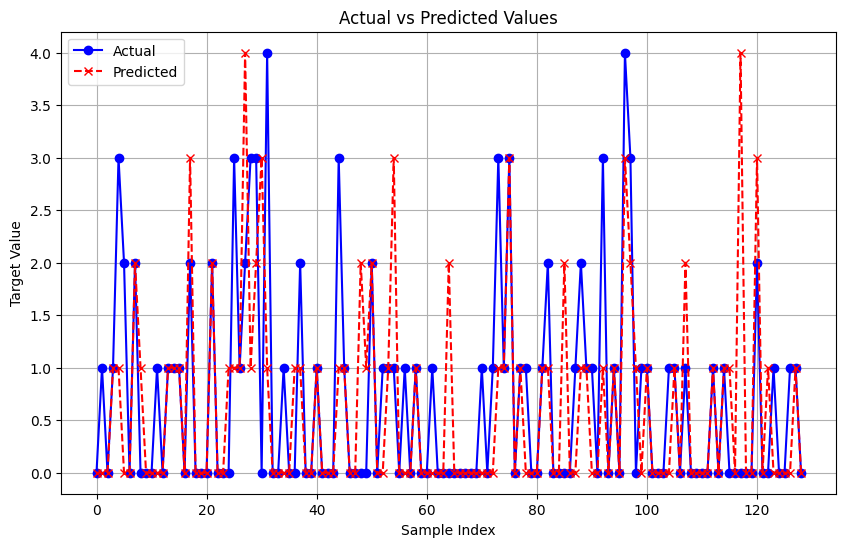

In [148]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='b', marker='o')  # Actual values
plt.plot(y_pred_gb, label='Predicted', color='r', linestyle='--', marker='x')  # Predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

#  Gini Coefficient (using AUC score for binary classification)

In [149]:
#  Gini Coefficient (using AUC score for binary classification)
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for each class
y_pred_proba = model_gb.predict_proba(x_test)

# Multi-class classification using OvR (One-vs-Rest)
if len(model_rf.classes_) > 2:
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
else:
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # For binary classification

print(f"AUC Score: {auc}")

AUC Score: 0.8358970823660192


 # Confusion Matrix

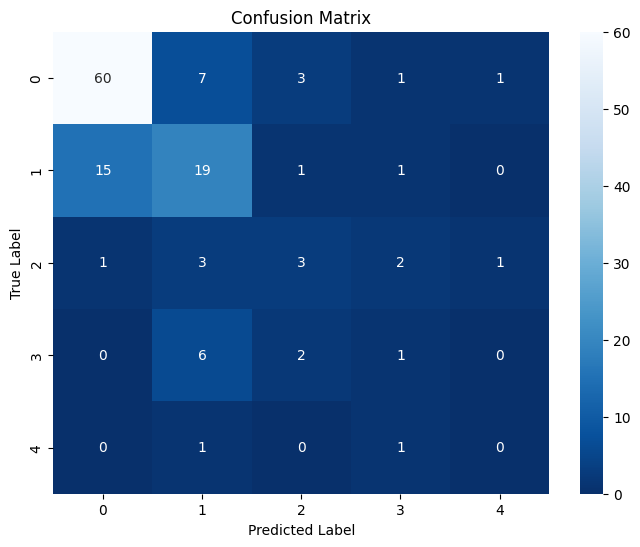

In [150]:
 # Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision


In [151]:
# Precision
precision = precision_score(y_test, y_pred_gb, average='macro')
print(f"Precision: {precision}")

Precision: 0.36345029239766086


# Recall

In [153]:
# Recall
recall = recall_score(y_test, y_pred_gb, average='macro')
print(f"Recall: {recall}")

Recall: 0.35444444444444445


# F1 Score

In [155]:
# F1 Score
f1 = f1_score(y_test, y_pred_gb, average="macro")
print(f"F1 Score: {f1}")

F1 Score: 0.3575422791212265


# AUC-ROC Curve

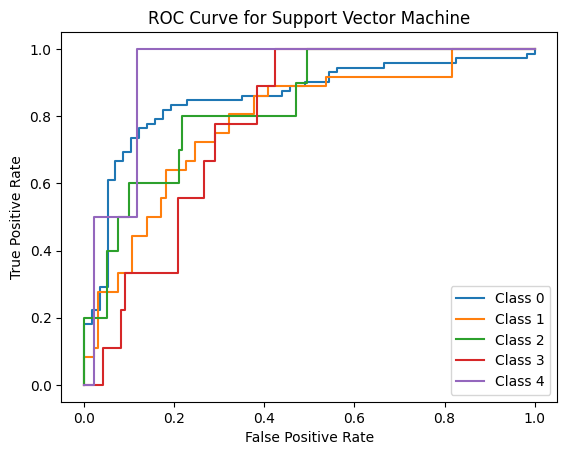

In [156]:
# AUC-ROC Curve
from sklearn.preprocessing import label_binarize
def plot_roc_curve(model, X_test, y_test):
    # Check if the model has predict_proba(), otherwise use decision_function()
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
    else:
        y_probs = model.decision_function(X_test)

    # Handle binary and multi-class classification
    if len(model.classes_) > 2:
        # Multi-class case (One-vs-Rest)
        y_test_bin = label_binarize(y_test, classes=model.classes_)
        for i, class_name in enumerate(model.classes_):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
            plt.plot(fpr, tpr, label=f'Class {class_name}')
    else:
        # Binary classification case
        y_probs = y_probs[:, 1] if y_probs.ndim > 1 else y_probs
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__}')
    models = ["ROC Curve for logistic Regression", "ROC Curve for DecisionTreeClassifier", "ROC Curve for RandomForestClassifier", "ROC Curve for GradientBoostingClassifier", "ROC Curve for Support Vector Machine"]

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    for i in models:
      plt.title(i)
    plt.legend(loc='best')
    plt.show()
# Example of calling the function for different models
plot_roc_curve(model_gb, x_test, y_test)

# Empowering the support vector machine: 

In [137]:
model_svm = SVC(probability=True)
model_svm.fit(x_train, y_train)

SVC(probability=True)

In [138]:

y_pred_svm = model_svm.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_svm)
print(accuracy)

0.6666666666666666


# Actual vs Predicted Values


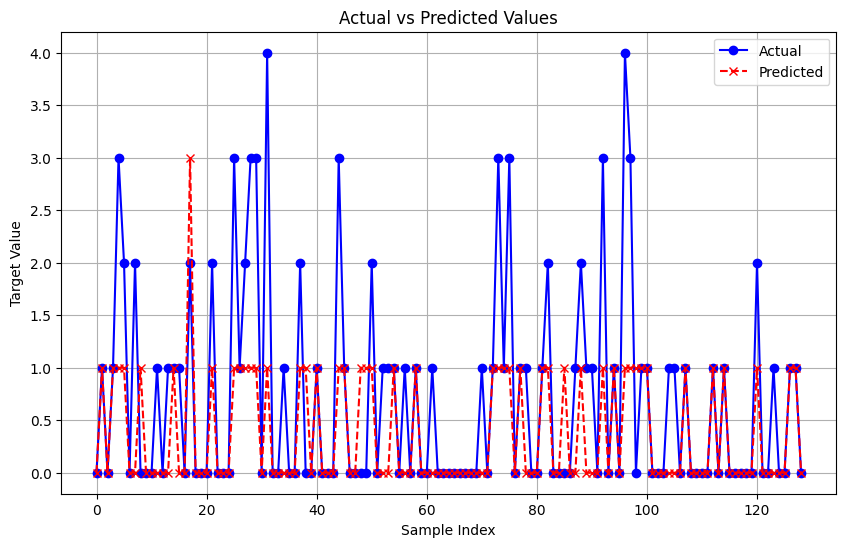

In [139]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='b', marker='o')  # Actual values
plt.plot(y_pred_svm, label='Predicted', color='r', linestyle='--', marker='x')  # Predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

#  Gini Coefficient (using AUC score for binary classification)

In [140]:
#  Gini Coefficient (using AUC score for binary classification)
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for each class
y_pred_proba = model_svm.predict_proba(x_test)

# Multi-class classification using OvR (One-vs-Rest)
if len(model_rf.classes_) > 2:
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
else:
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # For binary classification

print(f"AUC Score: {auc}")

AUC Score: 0.871624943212702


 # Confusion Matrix

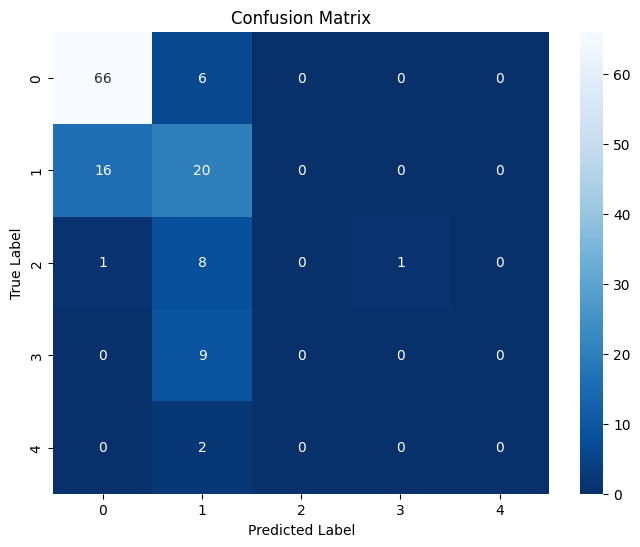

In [134]:
 # Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision


In [141]:
# Precision
precision = precision_score(y_test, y_pred_svm, average='macro')
print(f"Precision: {precision}")

Precision: 0.24792503346720213


C:\Users\PMYLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Recall

In [142]:
# Recall
recall = recall_score(y_test, y_pred_svm, average='macro')
print(f"Recall: {recall}")

Recall: 0.29444444444444445


# F1 Score

In [143]:
# F1 Score
f1 = f1_score(y_test, y_pred_svm, average="macro")
print(f"F1 Score: {f1}")

F1 Score: 0.2690880127439267


# AUC-ROC Curve

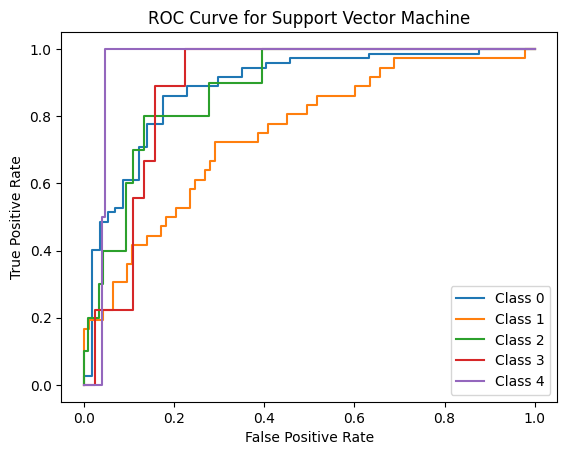

In [144]:
# AUC-ROC Curve
from sklearn.preprocessing import label_binarize
def plot_roc_curve(model, X_test, y_test):
    # Check if the model has predict_proba(), otherwise use decision_function()
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
    else:
        y_probs = model.decision_function(X_test)

    # Handle binary and multi-class classification
    if len(model.classes_) > 2:
        # Multi-class case (One-vs-Rest)
        y_test_bin = label_binarize(y_test, classes=model.classes_)
        for i, class_name in enumerate(model.classes_):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
            plt.plot(fpr, tpr, label=f'Class {class_name}')
    else:
        # Binary classification case
        y_probs = y_probs[:, 1] if y_probs.ndim > 1 else y_probs
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__}')
    models = ["ROC Curve for logistic Regression", "ROC Curve for DecisionTreeClassifier", "ROC Curve for RandomForestClassifier", "ROC Curve for GradientBoostingClassifier", "ROC Curve for Support Vector Machine"]

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    for i in models:
      plt.title(i)
    plt.legend(loc='best')
    plt.show()
# Example of calling the function for different models
plot_roc_curve(model_svm, x_test, y_test)

# Empowering the Logistic Regression: 

In [122]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_lr)
print(accuracy)

0.6589147286821705


# Actual vs Predicted Values


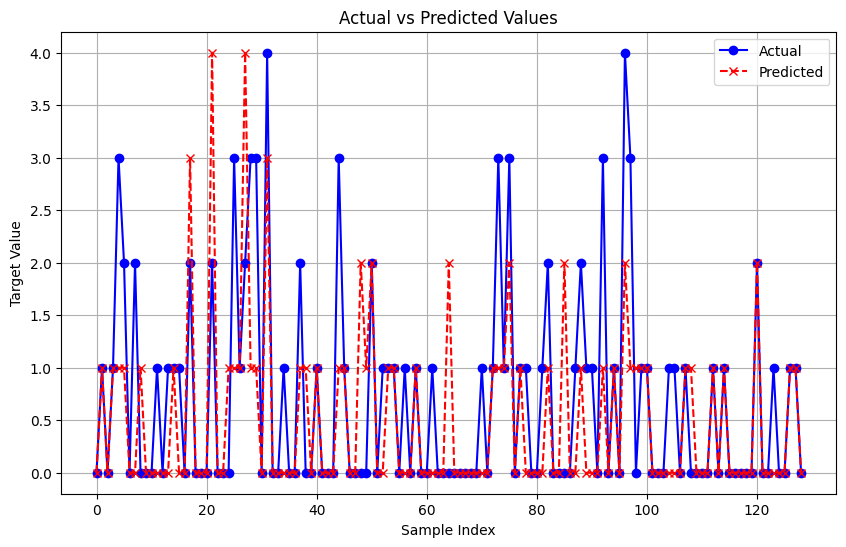

In [125]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='b', marker='o')  # Actual values
plt.plot(y_pred_lr, label='Predicted', color='r', linestyle='--', marker='x')  # Predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

#  Gini Coefficient (using AUC score for binary classification)

In [127]:
#  Gini Coefficient (using AUC score for binary classification)
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for each class
y_pred_proba_lr = model_lr.predict_proba(x_test)

# Multi-class classification using OvR (One-vs-Rest)
if len(model_rf.classes_) > 2:
    auc = roc_auc_score(y_test, y_pred_proba_lr, multi_class='ovr')
else:
    auc = roc_auc_score(y_test, y_pred_proba_lr[:, 1])  # For binary classification

print(f"AUC Score: {auc}")

AUC Score: 0.8733094246154748


 # Confusion Matrix

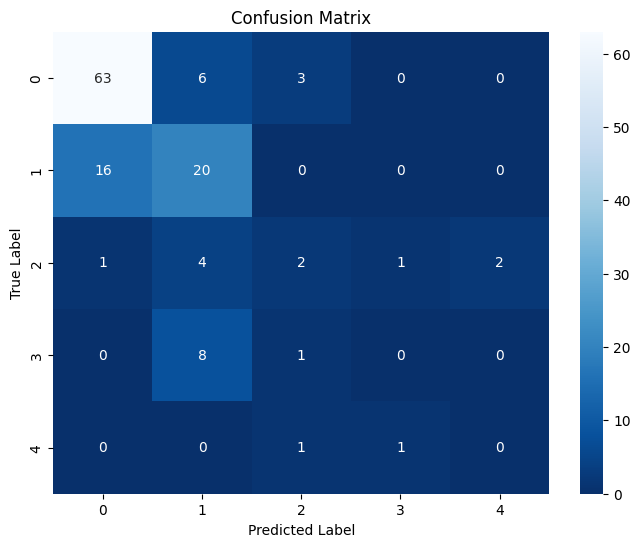

In [128]:
 # Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision


In [129]:
# Precision
precision = precision_score(y_test, y_pred_lr, average='macro')
print(f"Precision: {precision}")

Precision: 0.31990601503759397


# Recall

In [130]:
# Recall
recall = recall_score(y_test, y_pred_lr, average='macro')
print(f"Recall: {recall}")

Recall: 0.32611111111111113


# F1 Score

In [131]:
# F1 Score
f1 = f1_score(y_test, y_pred_lr, average="macro")
print(f"F1 Score: {f1}")

F1 Score: 0.3209564053217304


# AUC-ROC Curve

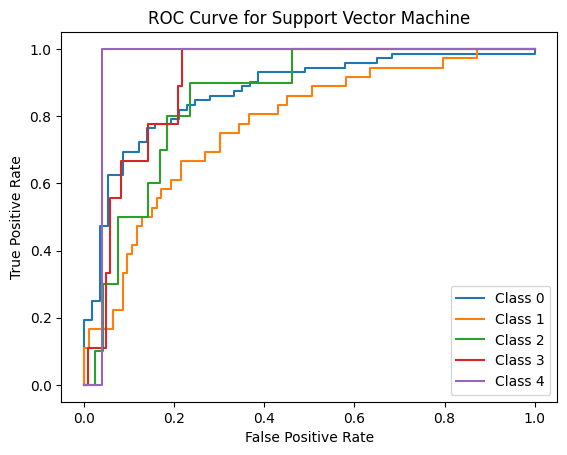

In [132]:
# AUC-ROC Curve
from sklearn.preprocessing import label_binarize
def plot_roc_curve(model, X_test, y_test):
    # Check if the model has predict_proba(), otherwise use decision_function()
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
    else:
        y_probs = model.decision_function(X_test)

    # Handle binary and multi-class classification
    if len(model.classes_) > 2:
        # Multi-class case (One-vs-Rest)
        y_test_bin = label_binarize(y_test, classes=model.classes_)
        for i, class_name in enumerate(model.classes_):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
            plt.plot(fpr, tpr, label=f'Class {class_name}')
    else:
        # Binary classification case
        y_probs = y_probs[:, 1] if y_probs.ndim > 1 else y_probs
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__}')
    models = ["ROC Curve for logistic Regression", "ROC Curve for DecisionTreeClassifier", "ROC Curve for RandomForestClassifier", "ROC Curve for GradientBoostingClassifier", "ROC Curve for Support Vector Machine"]

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    for i in models:
      plt.title(i)
    plt.legend(loc='best')
    plt.show()
# Example of calling the function for different models
plot_roc_curve(model_lr, x_test, y_test)

In [183]:
import joblib
joblib.dump(preprocessor, "scalar.pkl")

['scalar.pkl']

In [168]:

joblib.dump(model_rf, "heartDisease-umehabiba_Fakhira-batch1.pkl")

['heartDisease-umehabiba_Fakhira-batch1.pkl']